In [2]:
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73064 sha256=6fdbf459f7a19a3aa8794b5f348aa3da65fe484af698ad86a9b4079a17f86166
  Stored in directory: c:\users\think\appdata\local\pip\cache\wheels\77\47\e4\44a4ba1b7dfd53faaa35f59f1175e123b213ff401a8a56876b
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=5938 sha256=46a4b4ce040f5c1d64ee8ce13a3bfc888d89d7f920153db518a71b8109c725c9
  Stored in directory: c:\users\think\appdata\local\pip\cache\wheels\72\e6\db\122611605e60148f54ee2abaca98b2bbeafc6e22486a867bad
Successfully built kaggle python-slugify


You should consider upgrading via the 'c:\users\think\anaconda3\python.exe -m pip install --upgrade pip' command.


## Note

pclass: A proxy for socio-economic status (SES)
> 1st = Upper  
> 2nd = Middle  
> 3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
> Sibling = brother, sister, stepbrother, stepsister  
> Spouse = husband, wife (mistresses and fiancés were ignored)  


parch: The dataset defines family relations in this way...
> Parent = mother, father  
> Child = daughter, son, stepdaughter, stepson  
> Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
!pip install missingno

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno # null data를 시각화로 보여주는 라이브러리

# ignore warning
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [4]:



# Titanic 폴더
DATASET_DIR = 'C:/Users/Think/titanic/'


gender_submission = pd.read_csv(DATASET_DIR+'gender_submission.csv', encoding='utf-8')
test_set = pd.read_csv(DATASET_DIR+'test.csv', encoding='utf-8')
train_set = pd.read_csv(DATASET_DIR+'train.csv', encoding='utf-8')


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Think/titanic/gender_submission.csv'

<AxesSubplot:>

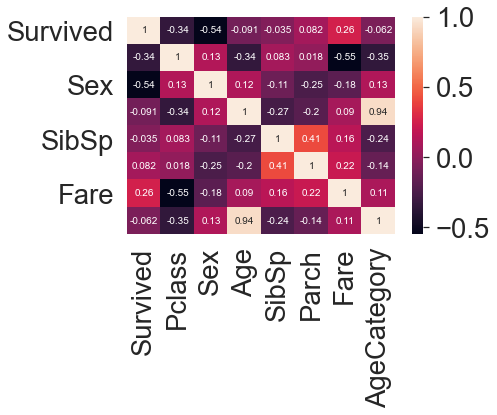

In [69]:
data_corr = train_set.drop(['PassengerId'], axis=1).corr()

sns.heatmap(data_corr, annot=True, )

In [21]:
train_set.info()

# Age : 714 / miss 177
# Cabin : 204 /miss 687
# Embarked : 889 /miss 2

# missing values

train_set.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# 분석용 차트
import matplotlib.pyplot as plt

# survived_crosstab과 pie_chart이용해서 파이 차트 그리기
def show_pie(df, cols):
    crosstab_dataframe = survived_crosstab(df, cols)
    pie_chart(crosstab_dataframe)

# cols와 survived간의 교차도표 생성
def survived_crosstab(df, cols):
    crosstab_dataframe = pd.crosstab( df[cols], df['Survived'])
    crosstab_dataframe.columns = crosstab_dataframe.columns.map({0:'Dead', 1:'Survived'})
    return crosstab_dataframe


# 파이 그래프 그리기
def pie_chart(df):
    # pie chart
    # pcol, prow = 차트를 출력할 개수, pcol * prow 만큼의 차트 출력
    
    frows, fcols = df.shape
    pcol = 3
    prow = (frows/pcol + frows%pcol)
    plot_height = prow * 2.5
    plt.figure(figsize=(8, plot_height))
    
    for row in range(0, frows):
        plt.subplot(prow, pcol, row+1)
        
        index_name = df.index[row]
        plt.pie(df.loc[index_name], labels=df.loc[index_name].index, autopct='%1.1f%%')
        plt.title("{}' survived".format(index_name))
        
    plt.show()
    

In [23]:
train_set['Survived'].dtype

dtype('int64')

In [24]:
train_set.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


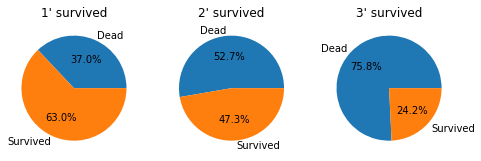

In [25]:
# PassengerId : index
# Survived : Dead / Alive
# Pclass :  1st = Upper, 2nd = Middle, 3rd = Lower
show_pie(train_set, 'Pclass')

# Upper class survived: 63.0%
# Middle class survived: 47.3%
# Lower class survived: 24.2%

In [26]:
    # Name : Name of passenger => to Title
    train_set['Title'] = train_set.Name.str.extract(' ([A-Za-z]+)\.')
    train_set['Title']

    test_set['Title'] = test_Set.Name.str.extract(' ([A-Za-z]+)\.')

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [27]:
train_set['Title'].unique()
train_set['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Countess      1
Mme           1
Don           1
Jonkheer      1
Capt          1
Sir           1
Lady          1
Name: Title, dtype: int64

In [28]:
train_set[train_set['Title']== 'Mme'][['Sex','Age']] # Mme : female / 24
train_set[train_set['Title']=='Mlle'][['Sex','Age']] # Mlle : female / 24
train_set[train_set['Title']=='Sir'][['Sex','Age']] # Sir : male / 49
train_set[train_set['Title']=='Jonkheer'][['Sex','Age']] # Jonkheer : male / 38
train_set[train_set['Title']=='Jonkheer'][['Sex','Age']]
train_set[train_set['Title']=='Lady'][['Sex','Age']] # Lady : female/48
train_set[train_set['Title']=='Capt'][['Sex','Age']] # Capt : male / 70
train_set[train_set['Title']=='Don'][['Sex','Age']] # Don : male / 40
train_set[train_set['Title']=='Ms'][['Sex','Age']] # female : female/28
train_set[train_set['Title']=='Countess'][['Sex','Age']] # Countess : female / 33
train_set[train_set['Title']== 'Major'][['Sex','Age']] # Major449 : male / 52   Major536 : male / 45
train_set[train_set['Title']== 'Col'][['Sex','Age']] # Col647 : male / 56   Col694 : male / 60

# Dr / Rev => others


,Sex,Age
647,male,56.0
694,male,60.0


In [29]:
train_set[train_set['Title']=='Mr']['Age'].mean() # 32.4
train_set[train_set['Title']=='Miss']['Age'].mean() # 21.8
train_set[train_set['Title']=='Mrs']['Age'].mean() # 35.9
train_set[train_set['Title']=='Master']['Age'].mean() # 4.6

train_set['Title'] = train_set['Title'].replace('Mme', 'Miss')
train_set['Title'] = train_set['Title'].replace('Mlle', 'Miss')
train_set['Title'] = train_set['Title'].replace('Sir', 'Mr')
train_set['Title'] = train_set['Title'].replace('Jonkheer', 'Mr')
train_set['Title'] = train_set['Title'].replace('Sir', 'Mr')
train_set['Title'] = train_set['Title'].replace('Lady', 'Mrs')
train_set['Title'] = train_set['Title'].replace('Capt', 'Mr')
train_set['Title'] = train_set['Title'].replace('Don', 'Mr')
train_set['Title'] = train_set['Title'].replace('Ms', 'Miss')
train_set['Title'] = train_set['Title'].replace('Countess', 'Mrs')
train_set['Title'] = train_set['Title'].replace('Major', 'Mr')
train_set['Title'] = train_set['Title'].replace('Col', 'Mr')

train_set['Title'] = train_set['Title'].replace(['Dr', 'Rev'], 'Others')


C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


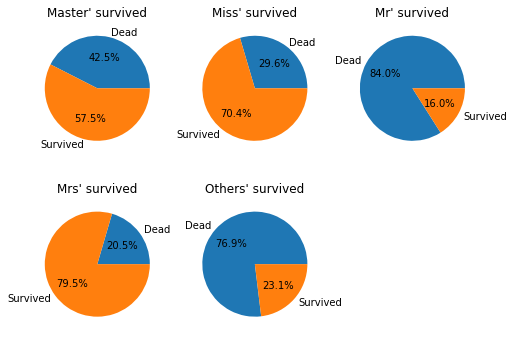

In [30]:
train_set.Title.value_counts()

show_pie(train_set, 'Title')

C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


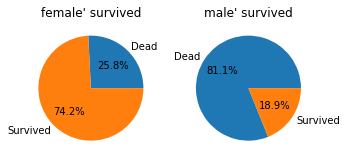

In [31]:
# Name : Name of passenger
# Sex : female, male
show_pie(train_set, 'Sex')

# female survived: 74.2
# male survived: 18.9

In [32]:
train_set.Age.isna().sum()

177

In [33]:
# Age : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# 호칭별 나이 평균
mean_age = train_set[['Title', 'Age']].groupby('Title').mean()


# 호칭과 호칭별 나이 평균값을 하나씩 가져온다 (ex :  index = Master, row = Age 4.574167)
# train_set.Title == Master 이고 train_set.Age가 null인 것의 index 들을 가져와서
# train_set.loc['65', 'Age'] = 4.574167
for index, row in mean_age.iterrows():
#     print('index: {}, row: {}'.format(index, row))
    nullIndex = train_set[(train_set.Title == index) & (train_set.Age.isna())].index
#     print('nullIndex: ', nullIndex)
#     print('row[0] : ', row[0])
    train_set.loc[nullIndex, 'Age'] = row[0]

    
train_set['AgeCategory'] = pd.qcut(train_set.Age, 8, labels=range(1, 9))
train_set.AgeCategory = train_set.AgeCategory.astype(int)


C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


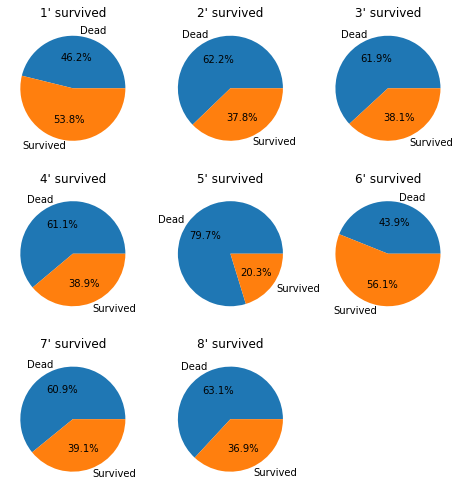

In [34]:
show_pie(train_set, 'AgeCategory')

In [35]:
# Sex col need One-hot encoding
# female = 0, male = 1

train_set['Sex'] = train_set['Sex'].map({'female':0, 'male':1})
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.2500,NaN,S,Mr,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,71.2833,C85,C,Mrs,7
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.1000,C123,S,Mrs,6
4,5,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.0500,NaN,S,Mr,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.00,0,0,211536,13.0000,NaN,S,Others,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.00,0,0,112053,30.0000,B42,S,Miss,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.86,1,2,W./C. 6607,23.4500,NaN,S,Miss,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.00,0,0,111369,30.0000,C148,C,Mr,4


C:\Users\Think\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


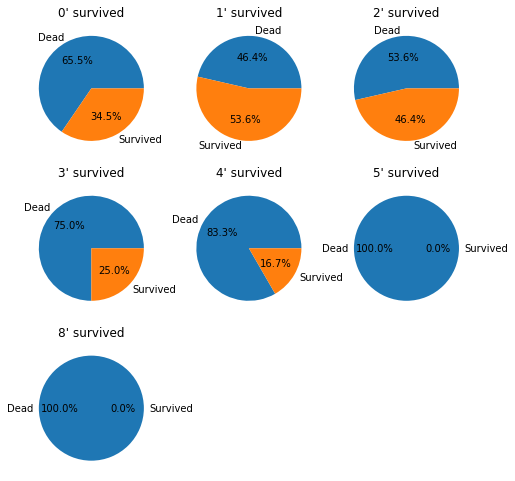

In [36]:
# SibSp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)



show_pie(train_set, 'SibSp')

# meaning 'havnig 1~2 sibling or sprouse seem to have more survivability'

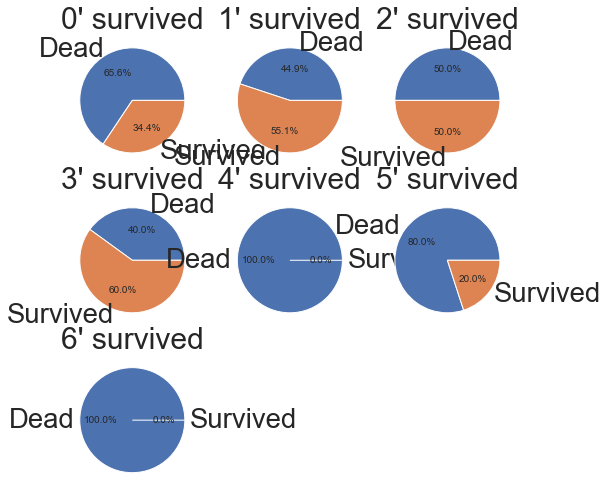

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [59]:
# Parch

show_pie(train_set, 'Parch')

train_set.Parch.value_counts()

# 1 ~ 2명의 Parch 즉, 부모님과 함께 탑승 했을때 생존률이 좀더 높다

## Family = Sibsp + Parch

In [76]:
train_set['FamilySize'] = train_set['SibSp'] + train_set['Parch']
train_set['FamilySize']


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilySize, Length: 891, dtype: int64

In [77]:
print('Maximum size of Family: ', train_set['FamilySize'].max())
print('Minimum size of Family: ', train_set['FamilySize'].min())

Maximum size of Family:  10
Minimum size of Family:  0


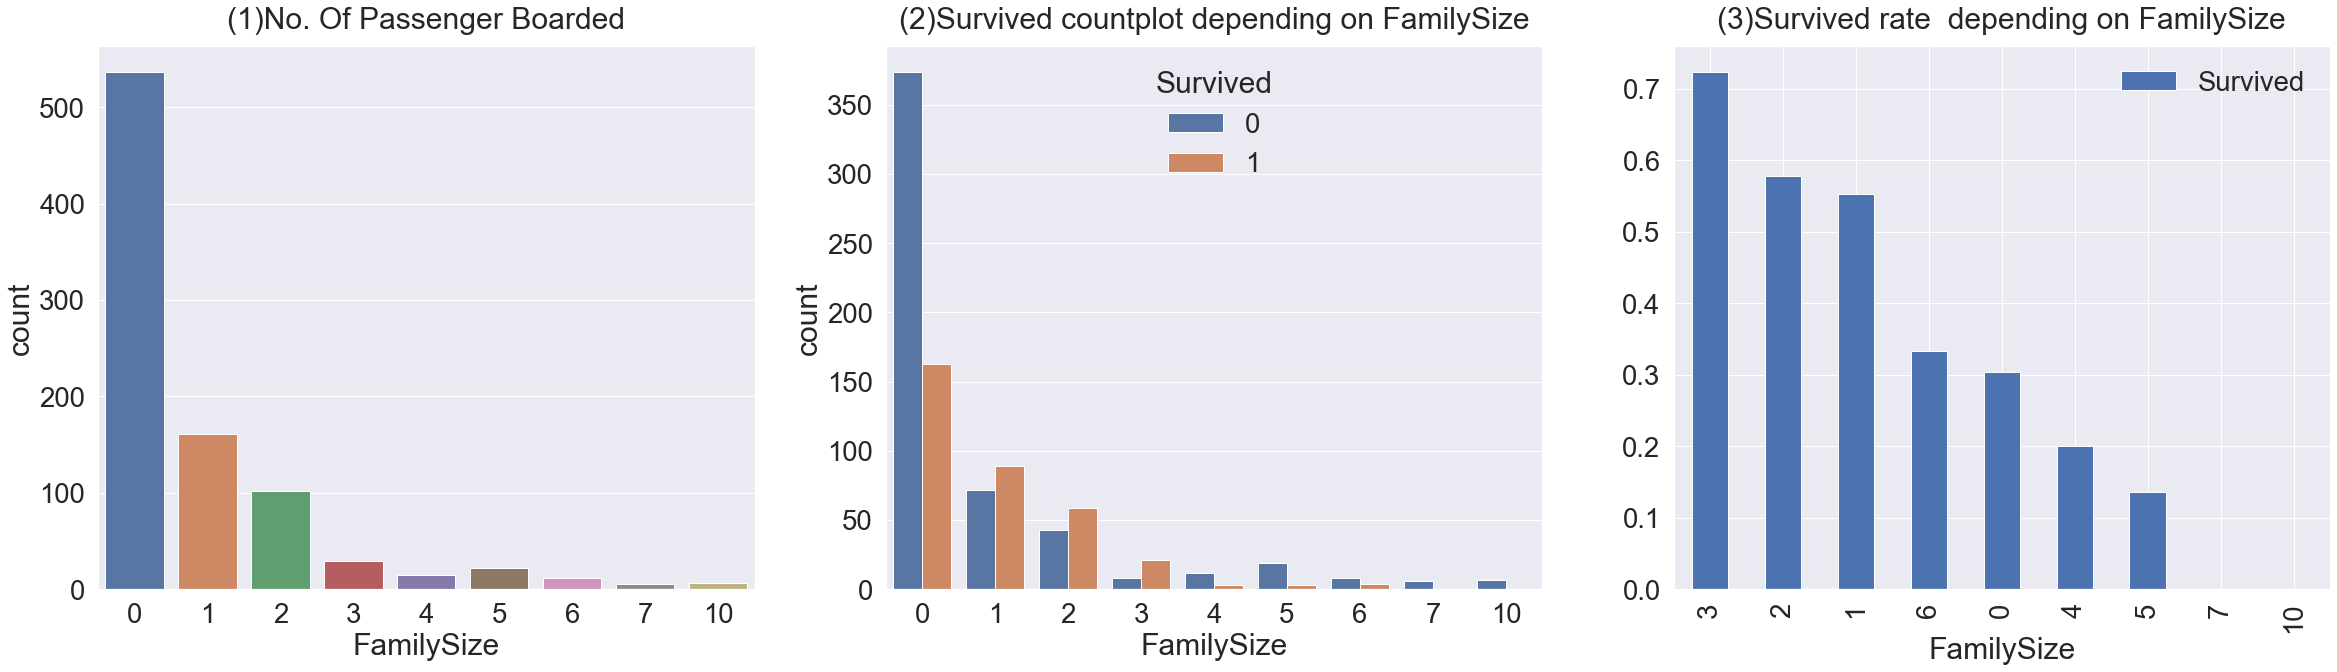

In [82]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=train_set, ax=ax[0])
ax[0].set_title('(1)No. Of Passenger Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=train_set, ax=ax[1])
ax[1].set_title('(2)Survived countplot depending on FamilySize', y=1.02)

train_set[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3)Survived rate  depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [53]:
# ticket

train_set.Ticket.value_counts()
train_set.Ticket.isna().sum() # 0

0

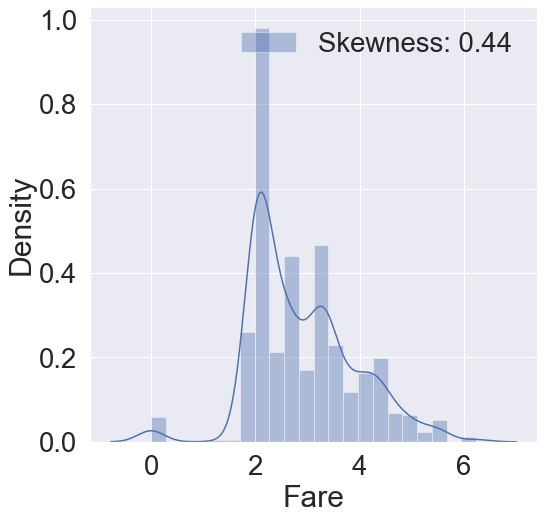

In [74]:
# Fare
train_set.Fare.value_counts()
train_set.Fare.isna().sum() # 0

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train_set['Fare'], color="b", label="Skewness: {:.2f}".format(train_set['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# 

In [73]:
# Fare 로그화를 통해 skewness
# Feature Engineering => 모델 성능 상향을 위해 피처를 이리저리 만저보는 것

train_set['Fare'] = train_set['Fare'].map(lambda i:np.log(i) if i > 0 else 0)



In [58]:
# Cabin
train_set.Cabin.value_counts()
train_set.Cabin.isna().sum() # 687

train_set.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [56]:
# Embarked
train_set.Embarked.value_counts()
train_set.Embarked.isna().sum() # 2


show_pie(train_set, 'Embarked')


2

## Feature Engineering

In [83]:
df_all = pd.concat([train_set, test_set])
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,S,Mr,3.0,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,7.0,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss,4.0,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,S,Mrs,6.0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,S,Mr,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,NaN,NaN,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,NaN,NaN,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,NaN,NaN,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,NaN,NaN,NaN


In [85]:
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeCategory,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,S,Mr,3.0,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,7.0,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss,4.0,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,S,Mrs,6.0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,S,Mr,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,NaN,NaN,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,NaN,NaN,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,NaN,NaN,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,NaN,NaN,NaN


In [ ]:
df_all.groupby([''])